<a href="https://colab.research.google.com/github/itzem-vg/1Parcial-IA/blob/main/Cop2_1_1P_Regresi%C3%B3n_one_vs_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1er Parcial IA `regresión one vs all`

**Estu:** Itzel Emily Velasquez Guerra
**Carrera:** Ing. Diseño y animacion digital

**Enlace del dataset:**  [Heart_Disease_Indicators - Enfermedades Cardiacas](https://www.kaggle.com/datasets/bhaveshmisra/heart-disease-indicators)

Este conjunto de datos contiene varios indicadores relacionados con la salud para una muestra de personas. A continuación, se incluye una breve descripción de cada columna:

**HeartDiseaseorAttack:** Indica si el individuo ha tenido una enfermedad cardíaca o un ataque cardíaco (binario: 0 = No, 1 = Sí).

**HighBP:** Estado de presión arterial alta
**HighChol:** Estado de colesterol alto

**CholCheck:** Frecuencia de control del colesterol (categórico).
**IMC:** Índice de Masa Corporal (continuo).

**Fumador:** Estado de fumador

**Accidente cerebrovascular:** antecedentes de accidente cerebrovascular

**Diabetes:** Estado de diabetes

**PhysActivity:** Nivel de actividad física (categórico).
**Frutas:** Frecuencia de consumo de frutas (categórica).

**Verduras:** Frecuencia de consumo de verduras (categórica).

**HvyAlcoholConsump:** Estado de consumo excesivo de alcohol
**AnyHealthcare:** Acceso a cualquier atención sanitaria

**NoDocbcCost:** No hay médico debido al costo

**GenHlth:** Evaluación general de salud (categórica).

**MentHlth:** Evaluación de salud mental (categórica).

**SaludFísica:** Evaluación de la salud física (categórica).

**DiffWalk:** Estado de dificultad para caminar

**Sexo:** Género del individuo

**Edad:** Edad del individuo (continua).
**Educación:** Nivel educativo (categórico).

**Ingresos:** Nivel de ingresos (categórico).



----------------
*   **Entrada:**  utilizaremos las colmunas :
*   **Salida:** Salud General
HeartDiseaseorAttack - la persona tiene efeermedad o ataque cardiaco

GenHlth



# Clasificación Multiclase (One vs All)

## Introducción

En este ejercicio se implementa la regresion one-vs-all y una red neuronal para reconocimiento de digitos.


In [1]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Manejo de datos
import pandas as pd

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# Librería para realizar gráficos
import matplotlib.pyplot as plt

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline



## 1 Cargamos los datos de entrenamiento
Subimos el dataset completo


In [42]:
# Importación de archivos desde la nube de Google Drive
from google.colab import drive
drive.mount('/content/drive')
#  Cargamos los datos de entrenamiento
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/heart_disease_health_indicators.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
data.columns.get_loc("Age")

19

In [57]:
data.drop(data.index[10000:], inplace=True)
# Asignamos valores a X y Y
X = data.iloc[:, [4,5,15,16,19]].values
y = data.iloc[:, 14].values

m = y.size

# Comprobamos los tamaños
print("Tamaño de X: ", X.shape)
print("Tamaño de Y: ",  y.shape)

display(data)

Tamaño de X:  (10000, 5)
Tamaño de Y:  (10000,)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,1,36,0,0,0,1,1,...,1,0,3,0,14,0,0,9,6,7
9996,0,0,0,1,33,0,0,0,1,1,...,1,0,2,0,0,0,1,6,6,5
9997,0,0,0,1,26,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,7
9998,0,0,0,1,29,1,0,0,1,1,...,1,0,3,0,0,0,1,7,6,8


In [58]:
print(X)

[[40  1 18 15  9]
 [25  1  0  0  7]
 [28  0 30 30  9]
 ...
 [26  1  0  0  8]
 [29  1  0  0  7]
 [24  0  0  0  7]]


In [59]:
print(y)

[5 3 5 ... 2 3 2]


### PUNTO 1 : *Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.*






### categoricos
si el IMC ES MAYOR 25.0 y 29.9 "sobrepeso"
MENOR a 18.5 "bajo peso"
ESTA ENTRE 18.5 y 24.9 "normal"

otro obesidad


In [60]:
df = pd.DataFrame(data)
# Función para clasificar los números
def clasificar_IMC(valor):
      if valor < 18.5:
        return "Bajo peso"
      elif 18.5 <= valor <= 24.9:
        return "Normal"
      elif 25.0 <= valor <= 29.9:
        return "Sobrepeso"
      else:
        return "Obesidad"

# Aplicar la función clasificar_numero a la primera columna y crear una nueva columna de texto 'Clasificación'
df['Estado_IMC'] = df['BMI'].apply(clasificar_IMC)

# Mostrar el DataFrame resultante
#df.head()
#display(df)
#print(X.shape)


In [61]:
def determinar_saludable(suma_columnas):
    # Define tu criterio para ser considerado saludable
    if suma_columnas > 2:  # Puedes ajustar este umbral según tus necesidades
        return True
    else:
        return False

# Sumar tres columnas y crear una nueva columna 'Es_Saludable' basada en esa suma
df['Es_Saludable'] = (df['PhysActivity'] + df['Fruits'] + df['Veggies'] + df['HvyAlcoholConsump'] + df['AnyHealthcare']).apply(determinar_saludable)

# Visualizar el resultado
#display(df)

In [62]:
# Función para convertir números en texto
def Tiene_Enfermedad(valor):
    """if valor == 1:
        return "Si tiene"

    else:
        return "No tiene"""


    if valor == 1:
        return True

    else:
        return False

# Aplicar la función a la última columna y crear la nueva columna 'Texto'
df['Tiene_Presion_Alta?'] = df.iloc[:, 1].apply(Tiene_Enfermedad)

display(df)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Estado_IMC,Es_Saludable,Tiene_Presion_Alta?
0,0,1,1,1,40,1,0,0,0,0,...,18,15,1,0,9,4,3,Obesidad,False,True
1,0,0,0,0,25,1,0,0,1,0,...,0,0,0,0,7,6,1,Sobrepeso,False,False
2,0,1,1,1,28,0,0,0,0,1,...,30,30,1,0,9,4,8,Sobrepeso,False,True
3,0,1,0,1,27,0,0,0,1,1,...,0,0,0,0,11,3,6,Sobrepeso,True,True
4,0,1,1,1,24,0,0,0,1,1,...,3,0,0,0,11,5,4,Normal,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,1,36,0,0,0,1,1,...,0,14,0,0,9,6,7,Obesidad,True,False
9996,0,0,0,1,33,0,0,0,1,1,...,0,0,0,1,6,6,5,Obesidad,True,False
9997,0,0,0,1,26,1,0,0,1,1,...,0,0,0,0,8,5,7,Sobrepeso,True,False
9998,0,0,0,1,29,1,0,0,1,1,...,0,0,0,1,7,6,8,Sobrepeso,True,False


In [63]:
#Variable categorica
EtiquetaY = data['GenHlth'].unique() #Obtenemos todos los valores unicos de la columna 'GenHlth - Salud general'

#Mostramos la lista de valores unicos y la cantidad de estos
print(EtiquetaY)
print(len(EtiquetaY))

[5 3 2 4 1]
5


### 2. Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

In [64]:
"""X = data.iloc[:20000, 1:785].values
y = data.iloc[:20000, 0].values

m = y.size"""
print(X.shape)
print(y.shape)
display(df)

(10000, 5)
(10000,)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Estado_IMC,Es_Saludable,Tiene_Presion_Alta?
0,0,1,1,1,40,1,0,0,0,0,...,18,15,1,0,9,4,3,Obesidad,False,True
1,0,0,0,0,25,1,0,0,1,0,...,0,0,0,0,7,6,1,Sobrepeso,False,False
2,0,1,1,1,28,0,0,0,0,1,...,30,30,1,0,9,4,8,Sobrepeso,False,True
3,0,1,0,1,27,0,0,0,1,1,...,0,0,0,0,11,3,6,Sobrepeso,True,True
4,0,1,1,1,24,0,0,0,1,1,...,3,0,0,0,11,5,4,Normal,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,1,36,0,0,0,1,1,...,0,14,0,0,9,6,7,Obesidad,True,False
9996,0,0,0,1,33,0,0,0,1,1,...,0,0,0,1,6,6,5,Obesidad,True,False
9997,0,0,0,1,26,1,0,0,1,1,...,0,0,0,0,8,5,7,Sobrepeso,True,False
9998,0,0,0,1,29,1,0,0,1,1,...,0,0,0,1,7,6,8,Sobrepeso,True,False


## Normalizacion

In [65]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [21]:
"""X_temp = data.iloc[:, 2:].values # Selecciona todas las columnas excepto la 0
X_norm, mu, sigma = featureNormalize(X_temp)"""

In [66]:
X_temp = data.iloc[:, [i for i in range(len(data.columns)) if i != 14]].values
X_norm, mu, sigma = featureNormalize(X_temp)

In [67]:
df_norm = pd.DataFrame(X_norm)
df_norm.insert(0, 'GenHlth', data['GenHlth'])
print(df_norm)
#display(df_norm)

      GenHlth         0         1         2         3         4         5  \
0           5 -0.335182  1.078036  1.106883  0.200913  1.804549  1.102643   
1           3 -0.335182 -0.927613 -0.903438 -4.977268 -0.564994  1.102643   
2           5 -0.335182  1.078036  1.106883  0.200913 -0.091085 -0.906912   
3           2 -0.335182  1.078036 -0.903438  0.200913 -0.249055 -0.906912   
4           2 -0.335182  1.078036  1.106883  0.200913 -0.722963 -0.906912   
...       ...       ...       ...       ...       ...       ...       ...   
9995        3 -0.335182 -0.927613  1.106883  0.200913  1.172671 -0.906912   
9996        2 -0.335182 -0.927613 -0.903438  0.200913  0.698762 -0.906912   
9997        2 -0.335182 -0.927613 -0.903438  0.200913 -0.407024  1.102643   
9998        3 -0.335182 -0.927613 -0.903438  0.200913  0.066884  1.102643   
9999        2 -0.335182 -0.927613  1.106883  0.200913 -0.722963 -0.906912   

             6         7         8  ...        11        12        13  \
0 

GRAFICA

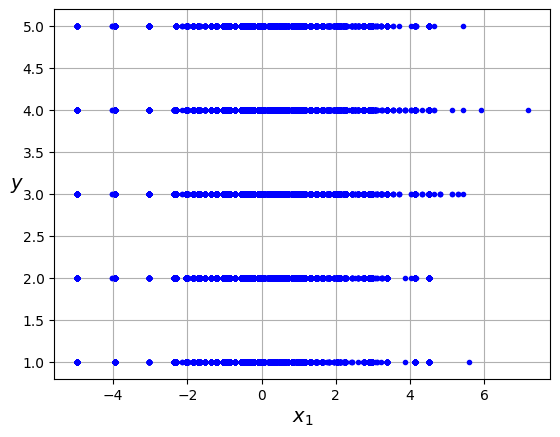

In [68]:
plt.plot(X_norm, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

In [69]:
# Convertir el diccionario en un DataFrame
#df = pd.DataFrame(data)

# Función para generar nuevas filas
def aumentar_filas(data):

    df_duplicated = data.copy()
    # Crear una lista para almacenar las nuevas filas

    nuevas_filas = []  # Lista para almacenar las nuevas filas

    for i, fila in df_duplicated.iterrows():
        # Obtener el valor de la primera columna (etiqueta Y)
        Y = fila.iloc[0]

        # Modificar el resto de las columnas (suma o resta de 0.2)
        # Creamos la copia de la fila original
        nueva_fila = fila.copy()

        # Modificamos las columnas a partir de la segunda (sin cambiar la primera)
        nueva_fila.iloc[1:] = fila.iloc[1:] + np.random.choice([-0.01, 0.01], size=len(fila) - 1)

        # Agregar la nueva fila a la lista de nuevas filas, manteniendo la etiqueta Y
        nuevas_filas.append([Y] + list(nueva_fila.iloc[1:]))

    # Convertir la lista de nuevas filas a un DataFrame
    nuevas_filas_df = pd.DataFrame(nuevas_filas, columns=df_duplicated.columns)

    # Concatenar el DataFrame original con el de las nuevas filas
    df_combined = pd.concat([df_duplicated, nuevas_filas_df], ignore_index=True)

    return df_combined

# Aplicar la función para duplicar las filas y generar nuevas
df_aumentado = aumentar_filas(data)

# Mostrar el nuevo DataFrame con las filas aumentadas
#print(df_aumentado)
display(df_aumentado)

Se han truncado las últimas 5000 líneas del flujo de salida.
  nueva_fila.iloc[1:] = fila.iloc[1:] + np.random.choice([-0.01, 0.01], size=len(fila) - 1)
<ipython-input-69-238562232b4e>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.000e-02  1.010e+00  9.900e-01  2.501e+01 -1.000e-02  1.000e-02
 -1.000e-02  9.900e-01  1.000e-02  9.900e-01  1.000e-02  1.010e+00
 -1.000e-02  3.010e+00 -1.000e-02  9.900e-01 -1.000e-02  1.000e-02
  9.010e+00  4.990e+00  6.010e+00]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  nueva_fila.iloc[1:] = fila.iloc[1:] + np.random.choice([-0.01, 0.01], size=len(fila) - 1)
<ipython-input-69-238562232b4e>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.010e+00  9.900e-01  9.900e-01  2.599e+01  1.000e-02 -1.000e-02
  1.000e-02  1.010e+00 -1.000e-02  1.000e-02  1.000e-02 

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.00,1.00,1.00,40.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,5.00,18.00,15.00,1.00,0.00,9.00,4.00,3.00
1,0,0.00,0.00,0.00,25.00,1.00,0.00,0.00,1.00,0.00,...,0.00,1.00,3.00,0.00,0.00,0.00,0.00,7.00,6.00,1.00
2,0,1.00,1.00,1.00,28.00,0.00,0.00,0.00,0.00,1.00,...,1.00,1.00,5.00,30.00,30.00,1.00,0.00,9.00,4.00,8.00
3,0,1.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,11.00,3.00,6.00
4,0,1.00,1.00,1.00,24.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,2.00,3.00,0.00,0.00,0.00,11.00,5.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0.01,0.99,1.01,36.01,0.01,-0.01,-0.01,0.99,0.99,...,1.01,0.01,3.01,0.01,13.99,0.01,-0.01,9.01,5.99,7.01
19996,0,0.01,0.01,0.99,33.01,0.01,-0.01,0.01,0.99,0.99,...,1.01,-0.01,2.01,-0.01,-0.01,-0.01,1.01,6.01,5.99,4.99
19997,0,0.01,0.01,1.01,26.01,0.99,0.01,-0.01,1.01,0.99,...,1.01,0.01,1.99,-0.01,0.01,-0.01,0.01,8.01,5.01,6.99
19998,0,0.01,-0.01,1.01,29.01,0.99,-0.01,0.01,0.99,0.99,...,1.01,-0.01,2.99,0.01,-0.01,-0.01,0.99,6.99,5.99,7.99


In [70]:
#Convertimos nuestra y en datos enteros, en caso de sufrir algun cambio
df_aumentado['GenHlth'] = df_aumentado['GenHlth'].round().astype(int)
data['GenHlth'].dtypes


dtype('int64')

In [ ]:
duplicated = df_aumentado.duplicated()
print(duplicated)
print ("-" * 50)

"""duplicated = df_aumentado.duplicated().any()

if duplicated:
    print("Hay duplicados en el dataset")
else:
    print("No hay duplicados en el dataset")"""

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Length: 20000, dtype: bool
--------------------------------------------------


'duplicated = df_aumentado.duplicated().any()\n\nif duplicated:\n    print("Hay duplicados en el dataset")\nelse:\n    print("No hay duplicados en el dataset")'

In [88]:
imc_position = data.columns.get_loc('Age')
print(imc_position)

19


In [94]:
# Asignamos valores a X y Y
X_df_Au = df_aumentado.iloc[:, [4,21]].values
y_df_Au = df_aumentado.iloc[:, 14].values

m_df_Au = y.size

# Comprobamos los tamaños
print("Tamaño de X: ", X_df_Au.shape)
print("Tamaño de Y: ",  y_df_Au.shape)

df_aumentado.head()


Tamaño de X:  (20000, 2)
Tamaño de Y:  (20000,)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### PUNTO 4 --Dividir los datos del dataset sintético en datos de entrenamiento y prueba

In [73]:
print(y_df_Au)


[5 3 5 ... 2 3 2]


In [74]:
# Calcula el índice que separa los conjuntos de entrenamiento y prueba
split_index = int(0.8 * len(df_aumentado))

# Divide el DataFrame en conjuntos de entrenamiento y prueba
train_df = df_aumentado[:split_index]
test_df = df_aumentado[split_index:]

# Obtén las características (X) y las etiquetas (y) para ambos conjuntos
X_train = train_df.iloc[:, :13].values
y_train = train_df.iloc[:, 14].values
X_test = test_df.iloc[:, :13].values
y_test = test_df.iloc[:, 14].values

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (16000, 13)
Tamaño de y_train: (16000,)
Tamaño de X_test: (4000, 13)
Tamaño de y_test: (4000,)


In [75]:
print(y_train)

[5 3 5 ... 2 3 2]


In [76]:

# Verificar la conversión
print("\nArray de Numpy de Datos de Entrenamiento (X_train):")
print(X_train[:5])  # Mostrar las primeras 5 filas de características de entrenamiento

print("\nArray de Numpy de Etiquetas de Entrenamiento (y_train):")
print(y_train[:5])  # Mostrar las primeras 5 etiquetas de entrenamiento


Array de Numpy de Datos de Entrenamiento (X_train):
[[ 0.  1.  1.  1. 40.  1.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0. 25.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  1. 28.  0.  0.  0.  0.  1.  0.  0.  1.]
 [ 0.  1.  0.  1. 27.  0.  0.  0.  1.  1.  1.  0.  1.]
 [ 0.  1.  1.  1. 24.  0.  0.  0.  1.  1.  1.  0.  1.]]

Array de Numpy de Etiquetas de Entrenamiento (y_train):
[5 3 5 2 2]


## SIGMOIDE

In [77]:
# Función sigmoide
def sigmoid(z):
    #z = np.clip(z, -500, 500)
    #z = np.asarray(z, dtype=np.float64)
      # Convierte z a un array de Numpy de tipo flotante
    return 1 / (1 + np.exp(-z))

In [78]:
# Función de coste con regularización
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    if y.dtype == bool:
        y = y.astype(int)

    h = sigmoid(X.dot(theta.T))
    #h = np.clip(h, 1e-15, 1 - 1e-15)  # Asegura que los valores de h estén entre (0, 1)

    temp = theta
    temp[0] = 0  # No regularizar el término de sesgo (bias)

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X) + (lambda_ / m) * temp

    return J, grad

In [79]:
# Función de descenso por gradiente
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))  # Asegura que X.dot(theta) sea compatible con np.exp
        #h = np.clip(h, 1e-15, 1 - 1e-15)  # Evitar valores extremos para la función de coste

        gradient = (alpha / m) * np.dot((h - y), X)
        theta = theta - gradient

        J, _ = lrCostFunction(theta, X, y, lambda_)
        J_history.append(J)

    return theta, J_history

In [80]:
# Parámetros de entrenamiento
alpha = 0.001  # Tasa de aprendizaje
num_iters = 300  # Número de iteraciones
lambda_ = 0.01  # Parámetro de regularización

In [81]:
# Asegurar que todas las columnas sean numéricas
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce').fillna(0).values.astype(np.float64)
y_train = pd.to_numeric(y_train, errors='coerce').astype(np.float64)


In [82]:
print(y_train)

[5. 3. 5. ... 2. 3. 2.]


In [ ]:
# Obtener las clases únicas del dataset
classes = np.unique(y_train)
models = {}  # Diccionario para almacenar los modelos entrenados
cost_histories = {}

print("classe:", classes)
print("modelo:", models)

classe: [1. 2. 3. 4. 5.]
modelo: {}


In [ ]:
# Entrenar un modelo de regresión logística para cada clase (One-vs-All)
# Entrenamiento del modelo con la nueva función sigmoide
for c in classes:
    print(f"Entrenando modelo para la clase: {c}")
    y_binary = (y_train == c).astype(int)  # Crear etiquetas binarias
    theta = np.zeros(X_train.shape[1], dtype=np.float64)  # Inicializar theta como array de Numpy con tipo flotante
    theta, cost_history = descensoGradiente(theta, X_train, y_binary, alpha, num_iters, lambda_)
    models[c] = theta  # Guardar el modelo entrenado
    cost_histories[c] = cost_history  # Guardar el historial de costos para la clase
    print(f"Coste final para la clase {c}: {cost_history[-1]}")


Entrenando modelo para la clase: 1.0
Coste final para la clase 1.0: 0.4267396829261536
Entrenando modelo para la clase: 2.0
Coste final para la clase 2.0: 0.616683777869515
Entrenando modelo para la clase: 3.0
Coste final para la clase 3.0: 0.6349765693945493
Entrenando modelo para la clase: 4.0
Coste final para la clase 4.0: 0.425475414068603
Entrenando modelo para la clase: 5.0
Coste final para la clase 5.0: 0.26454902432937294


In [ ]:
# Función para calcular los puntajes de cada modelo binario
def calcular_puntajes(models, X):
    # Inicializar una matriz para almacenar los puntajes
    puntajes = np.zeros((X.shape[0], len(models)))

    # Calcular los puntajes para cada modelo binario
    for i, (c, theta) in enumerate(models.items()):
        puntajes[:, i] = X.dot(theta)  # Calcular el puntaje lineal (z) para cada clase

    return puntajes

# ONE vs ALL

Entrenar varios clasificadores de regresión logística regularizados, uno para cada clase en el conjunto de datos.

Además, se utilizará una función para visualizar el costo.

También haremos uso de la función para graficar el costo.

In [ ]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))  # Inicializar matriz de parámetros
    X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Agregar la columna de unos para el término de intercepción

    # Lista para almacenar los costos de cada clasificador
    all_cost_history = []

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)  # Inicializar los parámetros theta
        options = {'maxiter': 100}  # Configurar las opciones del optimizador

        # Lista temporal para almacenar los costos de este clasificador
        cost_history = []

        # Callback para registrar el costo en cada iteración
        def callbackF(theta):
            cost, _ = lrCostFunction(theta, X, (y == c), lambda_)
            cost_history.append(cost)

        # Ejecutar la minimización utilizando el optimizador de Conjugate Gradient
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options,
                                callback=callbackF)

        # Guardar los parámetros optimizados y el historial de costos
        all_theta[c] = res.x
        all_cost_history.append(cost_history)

        # Imprimir solo el costo final después de la optimización
        print(f'Costo final para la clase {c}: {cost_history[-1]}')

    return all_theta, all_cost_history

In [ ]:
# Parámetros para entrenamiento
num_labels = len(np.unique(y_train))  # Número de etiquetas/clases en tu dataset
lambda_ = 0.01  # Regularización

# Llamar a la función para entrenar con One-vs-All
all_theta, all_cost_history = oneVsAll(X_train, y_train, num_labels, lambda_)

Costo final para la clase 0: 3.192481322945939e-07
Costo final para la clase 1: 0.383511592917377
Costo final para la clase 2: 0.5913766163379615
Costo final para la clase 3: 0.6123077944949469
Costo final para la clase 4: 0.36211034748001386


In [ ]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [ ]:
# Realizar predicciones en los datos de entrenamiento y prueba
y_pred_train = predictOneVsAll(all_theta, X_train)
y_pred_test = predictOneVsAll(all_theta, X_test)

In [ ]:
# Función para calcular la precisión
def calcular_precision(y_true, y_pred):
    """
    Calcula la precisión del modelo.

    Parámetros:
    y_true : ndarray
        Vector de etiquetas verdaderas.
    y_pred : ndarray
        Vector de etiquetas predichas por el modelo.

    Retorna:
    precision : float
        Precisión del modelo en porcentaje.
    """
    precision = np.mean(y_true == y_pred) * 100  # Calcula la precisión como el porcentaje de predicciones correctas
    return precision

In [ ]:
# Calcular la precisión para el conjunto de entrenamiento y prueba
precision_train = calcular_precision(y_train, y_pred_train)
precision_test = calcular_precision(y_test, y_pred_test)

print(f"Precisión del modelo en el conjunto de entrenamiento: {precision_train:.2f}%")
print(f"Precisión del modelo en el conjunto de prueba: {precision_test:.2f}%")

Precisión del modelo en el conjunto de entrenamiento: 40.31%
Precisión del modelo en el conjunto de prueba: 39.95%


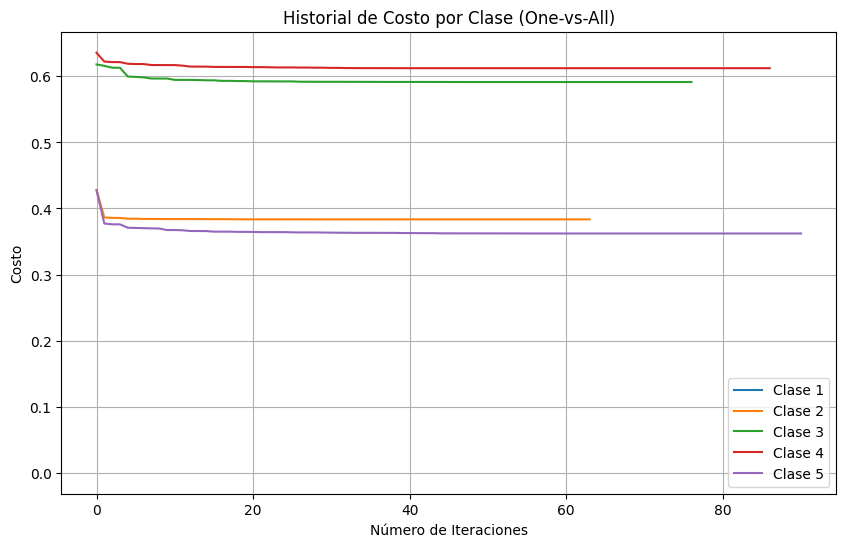

In [ ]:
def graficar_costo(all_cost_history, num_labels):
    """
    Grafica el costo de entrenamiento para cada clase en el modelo One-vs-All.

    Parámetros:
    all_cost_history : list
        Lista de listas, donde cada sublista contiene el historial de costos para un clasificador.
    num_labels : int
        Número de etiquetas o clases en el dataset.
    """
    plt.figure(figsize=(10, 6))

    # Graficar el costo para cada clase
    for c in range(num_labels):
        iteraciones = range(len(all_cost_history[c]))  # Obtener la cantidad de iteraciones para la clase c
        plt.plot(iteraciones, all_cost_history[c], label=f'Clase {c+1}')

    plt.xlabel('Número de Iteraciones')
    plt.ylabel('Costo')
    plt.title('Historial de Costo por Clase (One-vs-All)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para graficar el costo
graficar_costo(all_cost_history, num_labels)

In [ ]:
all_theta_1, cost_histories_1 = oneVsAll(X_train, y_train, num_labels, lambda_)

Costo final para la clase 0: 3.192481322945939e-07
Costo final para la clase 1: 0.383511592917377
Costo final para la clase 2: 0.5913766163379615
Costo final para la clase 3: 0.6123077944949469
Costo final para la clase 4: 0.36211034748001386


In [ ]:
all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

Costo final para la clase 0: 3.192481322945939e-07
Costo final para la clase 1: 0.383511592917377
Costo final para la clase 2: 0.5913766163379615
Costo final para la clase 3: 0.6123077944949469
Costo final para la clase 4: 0.36211034748001386


In [ ]:
all_theta_3, cost_histories_3 = oneVsAll(X_train, y_train, num_labels, lambda_)

Costo final para la clase 0: 3.192481322945939e-07
Costo final para la clase 1: 0.383511592917377
Costo final para la clase 2: 0.5913766163379615
Costo final para la clase 3: 0.6123077944949469
Costo final para la clase 4: 0.36211034748001386



Precisión por clase en el conjunto de entrenamiento:
Precisión para la clase 0: 100.00%
Precisión para la clase 1: 83.33%
Precisión para la clase 2: 59.11%
Precisión para la clase 3: 59.84%
Precisión para la clase 4: 84.92%

Precisión por clase en el conjunto de prueba:
Precisión para la clase 0: 100.00%
Precisión para la clase 1: 80.60%
Precisión para la clase 2: 55.07%
Precisión para la clase 3: 62.00%
Precisión para la clase 4: 87.02%


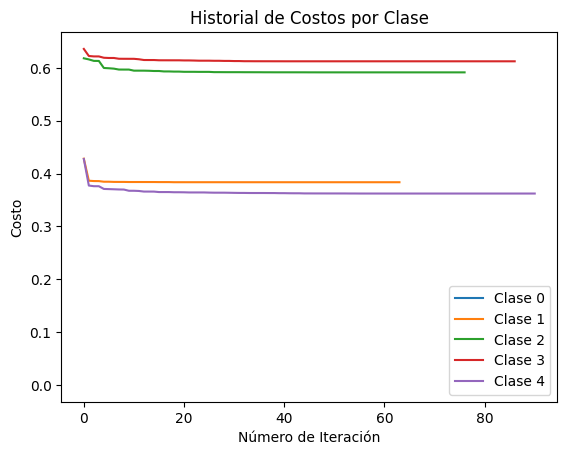


Realizando un segundo entrenamiento con nuevos datos...

Precisión por clase en el conjunto de entrenamiento (segunda iteración):
Precisión para la clase 0: 100.00%
Precisión para la clase 1: 83.33%
Precisión para la clase 2: 59.11%
Precisión para la clase 3: 59.84%
Precisión para la clase 4: 84.92%

Precisión por clase en el conjunto de prueba (segunda iteración):
Precisión para la clase 0: 100.00%
Precisión para la clase 1: 80.60%
Precisión para la clase 2: 55.07%
Precisión para la clase 3: 62.00%
Precisión para la clase 4: 87.02%


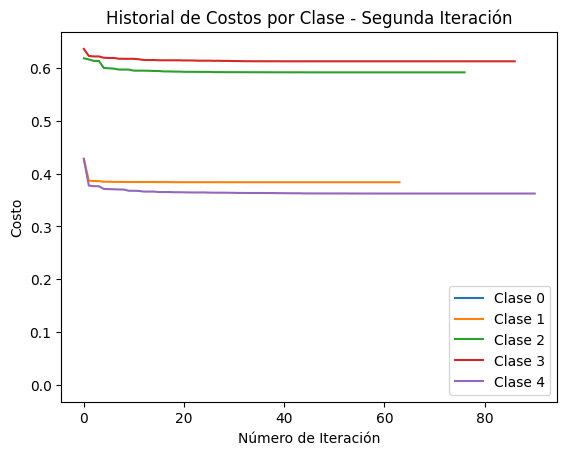


Realizando un tecer entrenamiento con nuevos datos...

Precisión por clase en el conjunto de entrenamiento (tercera iteración):
Precisión para la clase 0: 100.00%
Precisión para la clase 1: 83.33%
Precisión para la clase 2: 59.11%
Precisión para la clase 3: 59.84%
Precisión para la clase 4: 84.92%

Precisión por clase en el conjunto de prueba (tercera iteración):
Precisión para la clase 0: 100.00%
Precisión para la clase 1: 80.60%
Precisión para la clase 2: 55.07%
Precisión para la clase 3: 62.00%
Precisión para la clase 4: 87.02%


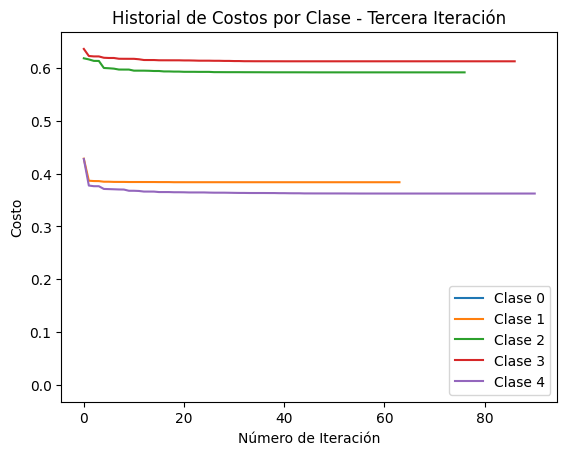

In [ ]:
# Función personalizada para calcular la precisión
def accuracy_score_manual(y_true, y_pred):
    correct = sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

# Función para calcular la precisión para cada clase
def accuracy_per_class(y_true, y_pred, num_labels):
    accuracies = []
    for label in range(num_labels):
        # Filtrar solo las instancias de la clase actual
        y_true_class = (y_true == label)
        y_pred_class = (y_pred == label)
        # Calcular precisión para la clase actual
        accuracy = accuracy_score_manual(y_true_class, y_pred_class) * 100
        accuracies.append(accuracy)
        print(f'Precisión para la clase {label}: {accuracy:.2f}%')
    return accuracies

"""print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')"""

# Entrenar el modelo por primera vez para 10 etiquetas
#all_theta_1, cost_histories_1 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el conjunto de entrenamiento y prueba
y_pred_train_1 = predictOneVsAll(all_theta_1, X_train)
y_pred_test_1 = predictOneVsAll(all_theta_1, X_test)

# Calcular la precisión global en ambos conjuntos usando la función manual
accuracy_train_1 = accuracy_score_manual(y_train, y_pred_train_1) * 100
accuracy_test_1 = accuracy_score_manual(y_test, y_pred_test_1) * 100

"""print(f'Primera precisión global en el conjunto de entrenamiento: {accuracy_train_1:.2f}%')
print(f'Primera precisión global en el conjunto de prueba: {accuracy_test_1:.2f}%')"""

# Calcular la precisión por clase en el conjunto de entrenamiento y prueba
print("\nPrecisión por clase en el conjunto de entrenamiento:")
accuracy_per_class(y_train, y_pred_train_1, num_labels)

print("\nPrecisión por clase en el conjunto de prueba:")
accuracy_per_class(y_test, y_pred_test_1, num_labels)

# Graficar el historial de costos para la primera iteración (para las 10 clases)
for i in range(num_labels):  # Aquí i va de 0 a 9
    plt.plot(cost_histories_1[i], label=f'Clase {i}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase')
plt.legend()
plt.show()

# Hacer un segundo entrenamiento
print("\nRealizando un segundo entrenamiento con nuevos datos...")

# Entrenar el modelo por segunda vez (para 10 etiquetas)
#all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el segundo conjunto de entrenamiento y prueba
y_pred_train_2 = predictOneVsAll(all_theta_2, X_train)
y_pred_test_2 = predictOneVsAll(all_theta_2, X_test)

# Calcular la precisión global en ambos conjuntos para el segundo entrenamiento usando la función manual
accuracy_train_2 = accuracy_score_manual(y_train, y_pred_train_2) * 100
accuracy_test_2 = accuracy_score_manual(y_test, y_pred_test_2) * 100

"""print(f'Segunda precisión global en el conjunto de entrenamiento: {accuracy_train_2:.2f}%')
print(f'Segunda precisión global en el conjunto de prueba: {accuracy_test_2:.2f}%')"""

# Calcular la precisión por clase en el segundo conjunto de entrenamiento y prueba
print("\nPrecisión por clase en el conjunto de entrenamiento (segunda iteración):")
accuracy_per_class(y_train, y_pred_train_2, num_labels)

print("\nPrecisión por clase en el conjunto de prueba (segunda iteración):")
accuracy_per_class(y_test, y_pred_test_2, num_labels)

# Graficar el historial de costos para la segunda iteración (para las 10 clases)
for i in range(num_labels):  # Nuevamente, i va de 0 a 9
    plt.plot(cost_histories_2[i], label=f'Clase {i}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase - Segunda Iteración')
plt.legend()
plt.show()



# Hacer un TERCER entrenamiento
print("\nRealizando un tecer entrenamiento con nuevos datos...")

# Entrenar el modelo por segunda vez (para 10 etiquetas)
#all_theta_3, cost_histories_3 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el segundo conjunto de entrenamiento y prueba
y_pred_train_3 = predictOneVsAll(all_theta_3, X_train)
y_pred_test_3 = predictOneVsAll(all_theta_3, X_test)

# Calcular la precisión global en ambos conjuntos para el segundo entrenamiento usando la función manual
accuracy_train_3 = accuracy_score_manual(y_train, y_pred_train_3) * 100
accuracy_test_3 = accuracy_score_manual(y_test, y_pred_test_3) * 100

"""print(f'Tercera precisión global en el conjunto de entrenamiento: {accuracy_train_3:.2f}%')
print(f'Tercera precisión global en el conjunto de prueba: {accuracy_test_3:.2f}%')"""

# Calcular la precisión por clase en el segundo conjunto de entrenamiento y prueba
print("\nPrecisión por clase en el conjunto de entrenamiento (tercera iteración):")
accuracy_per_class(y_train, y_pred_train_3, num_labels)

print("\nPrecisión por clase en el conjunto de prueba (tercera iteración):")
accuracy_per_class(y_test, y_pred_test_3, num_labels)

# Graficar el historial de costos para la segunda iteración (para las 10 clases)
for i in range(num_labels):  # Nuevamente, i va de 0 a 9
    plt.plot(cost_histories_3[i], label=f'Clase {i}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase - Tercera Iteración')
plt.legend()
plt.show()